In [54]:
# Setup
!pip install -U pyTigerGraph
!pip install pandas
!pip install networkx
!pip install matplotlib
!pip install venn
!pip install scipy


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/45.9 MB 4.3 MB/s eta 0:00:11
   ---------------------------------------- 0.3/45.9 MB 3.8 MB/s eta 0:00:12
   ---------------------------------------- 0.5/45.9 MB 4.2 MB/s eta 0:00:11
    --------------------------------------- 0.6/45.9 MB 4.3 MB/s eta 0:00:11
    --------------------------------------- 0.8/45.9 MB 4.2 MB/s eta 0:00:11
    --------------------------------------- 0.9/45.9 MB 4.3 MB/s eta 0:00:11
    --------------------------------------- 1.1/45.9 MB 4.5 MB/s eta 0:00:11
   - -------------------------------------- 1.3/45.9 MB 4.5 MB/s eta 0:00:10
   - ----

In [2]:
# Imports
import pyTigerGraph as tg
import json
import pandas as pd

# Connection parameters
hostName = "..."
userName = "..."
password = "..."

conn = tg.TigerGraphConnection(host=hostName, username=userName, password=password, graphname="MyGraph")

print("Connected")

Connected


In [77]:
import pandas as pd

# Create a DataFrame for SDGs
# Define data for SDGs
sdg_data = {
    "id": ["SDG1", "SDG2", "SDG3", "SDG4", "SDG5", "SDG6", "SDG7", "SDG8", "SDG9"],  
    "name": ["No Poverty", "Zero Hunger", "Good Health and Well-being", "Quality Education", "Gender Equality", "Clean Water and Sanitation", "Affordable and Clean Energy", "Decent Work and Economic Growth", "Industry, Innovation and Infrastructure"],  
    "category": ["Social", "Social", "Social", "Social", "Social", "Environment", "Environment", "Governance", "Governance"] 
}

sdg_df = pd.DataFrame(sdg_data)

# Create a DataFrame for ESG metrics
# Define data for ESG metrics
esg_data = {
    "id": ["ESG1", "ESG2", "ESG3", "ESG4", "ESG5", "ESG6", "ESG7", "ESG8", "ESG9"],  
    "name": ["Carbon Emissions", "Employee Diversity", "Labor Practices", "Ethical Sourcing", "Community Engagement", "Board Diversity", "Transparency and Accountability", "Executive Compensation", "Corporate Governance"],  
    "category": ["Environment", "Social", "Social", "Governance", "Social", "Governance", "Governance", "Governance", "Governance"]  
}

esg_df = pd.DataFrame(esg_data)

# Create a DataFrame for countries



In [5]:
# Define GSQL query for creating vertices and edges
gsql_query = '''
  CREATE VERTEX SDG (PRIMARY_ID id STRING, name STRING, category STRING) WITH primary_id_as_attribute="true";
  CREATE VERTEX ESG (PRIMARY_ID id STRING, name STRING, category STRING) WITH primary_id_as_attribute="true";
  CREATE VERTEX Country (PRIMARY_ID id STRING, name STRING, population INT) WITH primary_id_as_attribute="true";

  CREATE DIRECTED EDGE SDG_ESG (FROM SDG, TO ESG);
  
'''

# Execute GSQL query to create vertices and edges
results = conn.gsql(gsql_query)

# Print results
print(results)

KeyboardInterrupt: 

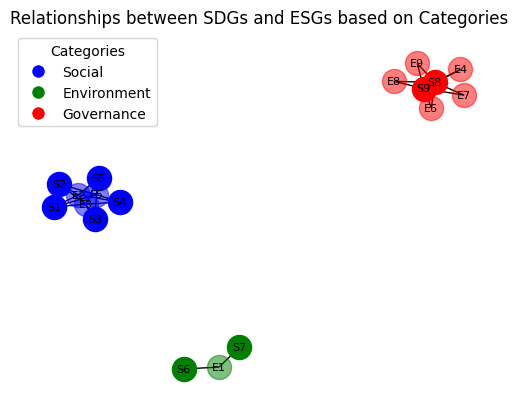

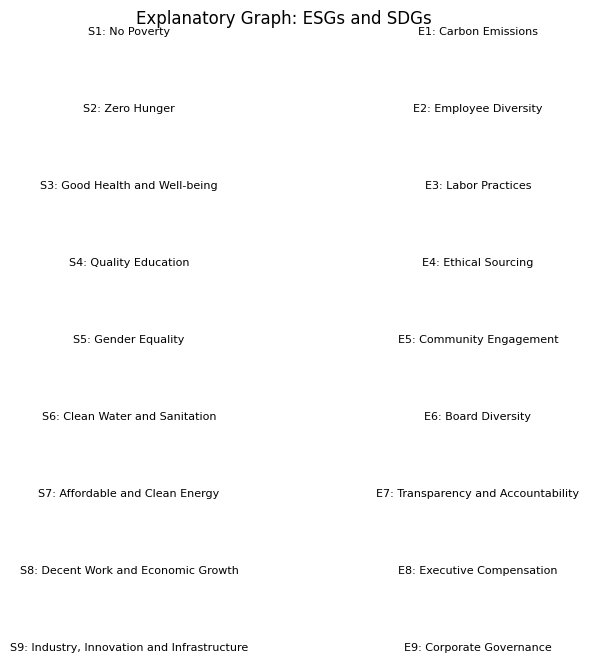

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph for the main visualization
G_main = nx.Graph()

# Create a graph for explanatory purposes
G_explanatory = nx.DiGraph()

# Add SDGs as nodes with respective categories to the main graph
for idx, row in sdg_df.iterrows():
    G_main.add_node(f"S{idx+1}", label=f"S{idx+1}", type="SDG", category=row['category'])
    G_explanatory.add_node(f"S{idx+1}", label=row['name'])

# Add ESGs as nodes with respective categories to the main graph
for idx, row in esg_df.iterrows():
    G_main.add_node(f"E{idx+1}", label=f"E{idx+1}", type="ESG", category=row['category'])
    G_explanatory.add_node(f"E{idx+1}", label=row['name'])

# Add relationships between SDGs and ESGs as edges based on their categories to the main graph
for sdg_idx, sdg_row in sdg_df.iterrows():
    for esg_idx, esg_row in esg_df.iterrows():
        if sdg_row['category'] == esg_row['category']:
            G_main.add_edge(f"S{sdg_idx+1}", f"E{esg_idx+1}")
            G_explanatory.add_edge(f"E{esg_idx+1}", f"S{sdg_idx+1}")


# Draw the main graph
pos_main = nx.spring_layout(G_main)  # Layout algorithm

# Define node colors based on categories for the main graph
node_colors_main = {"Social": "blue", "Environment": "green", "Governance": "red"}
node_types_main = nx.get_node_attributes(G_main, "type")
node_categories_main = nx.get_node_attributes(G_main, "category")
node_size_main = 300  # Default node size

# Draw nodes with different colors based on categories for the main graph
for node, attributes in G_main.nodes(data=True):
    if attributes['type'] == "SDG":
        color = node_colors_main[attributes['category']]
        nx.draw_networkx_nodes(G_main, pos_main, nodelist=[node], node_color=color, node_size=node_size_main)
    elif attributes['type'] == "ESG":
        color = node_colors_main[attributes['category']]
        nx.draw_networkx_nodes(G_main, pos_main, nodelist=[node], node_color=color, node_size=node_size_main, alpha=0.5)

# Draw edges for the main graph
nx.draw_networkx_edges(G_main, pos_main)

# Draw node labels with adjusted font size and color for the main graph
nx.draw_networkx_labels(G_main, pos_main, labels={node: attributes['label'] for node, attributes in G_main.nodes(data=True)},
                        font_size=8, font_color='black')  

# Draw legend for the main graph
legend_handles_main = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color)
                  for label, color in node_colors_main.items()]
plt.legend(handles=legend_handles_main, title="Categories", loc='upper left')

# Customize the main plot
plt.title("Relationships between SDGs and ESGs based on Categories")
plt.axis("off")  # Hide axis
plt.show()

# Create the table-like representation
plt.figure(figsize=(5, 5))  # Adjust figure size as needed
plt.title("Explanatory Graph: ESGs and SDGs")

# Define the positions for ESGs and SDGs
y_offset = 1.0
for idx, (sdg_idx, sdg_row) in enumerate(sdg_df.iterrows()):
    plt.text(0.1, y_offset - 0.2 * idx, f"S{idx+1}: {sdg_row['name']}", ha='center', va='center', fontsize=8)

y_offset = 1.0
for idx, (esg_idx, esg_row) in enumerate(esg_df.iterrows()):
    plt.text(1.0, y_offset - 0.2 * idx, f"E{idx+1}: {esg_row['name']}", ha='center', va='center', fontsize=8)

# Customize the plot
plt.axis("off")  # Hide axis
plt.show()
